This function defines the PDE, by way of $\mathbf{f}(\mathbf{u})$ and its derivative. Note that the function will have access to all of the properties of a discretization, as if they were returned by `rectdisc`.

The function here defines the PDE, by way of $\mathbf{f}(\mathbf{u})$ and its derivative (Jacobian matrix). Note that the function will have access to all of the properties of a discretization, as if they were returned by `rectdisc`.

In [1]:
include("../FNC.jl") 
using SparseArrays
lambda = 1.5

pde = function (U,X,Y,d)
    LU = d.Dxx*U + U*d.Dyy';     # apply Laplacian
    F = @. LU - lambda/(U+1)^2   # residual

    L = kron(d.Dyy,d.Ix) + kron(d.Iy,d.Dxx)  
    u = d.vec(U)
    J = L + spdiagm( 0 => @. 2*lambda/(u+1)^3 ) 
    return F,J
end      

#3 (generic function with 1 method)

We define a trivial zero function for the Dirichlet boundary condition, and solve. 

In [2]:
g(x,y) = 0     # boundary condition
U,X,Y = FNC.newtonpde(pde,g,100,[0,2.5],80,[0,1]);

Norm of residual = 15.09708310676239
Norm of residual = 1.980524231823856
Norm of residual = 0.07529414189171439
Norm of residual = 0.0001385680589345212
Norm of residual = 6.842840639652765e-9
Norm of residual = 1.944701379169361e-11


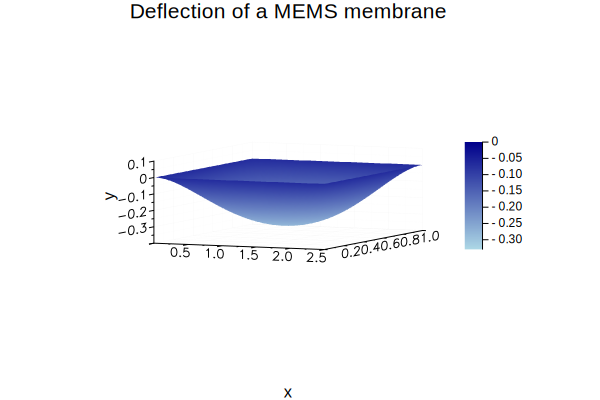

In [3]:
using Plots
surface(X[:,1],Y[1,:],U',color=:blues,aspect_ratio=1,
    xlabel="x",ylabel="y",title="Deflection of a MEMS membrane")        